In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('~/Downloads/Kid.csv')

In [3]:
data.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [4]:
data.drop(columns=['Obs No.'])

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


In [5]:
data.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

In [6]:
data.Buy.value_counts()

0    548
1    125
Name: Buy, dtype: int64

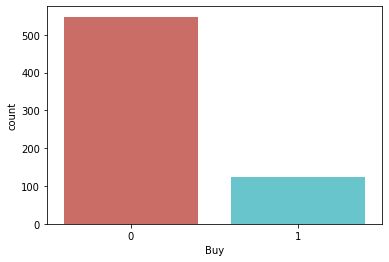

In [7]:
sns.countplot(x = 'Buy', data = data, palette = 'hls')

In [8]:
X = data[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional','Is Retired', 'Unemployed', 'Residence Length', 'Dual Income', 'Minors', 'Own', 'House', 'White','English', 'Prev Child Mag', 'Prev Parent Mag']]
y = data['Buy']

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
regressor = LogisticRegression(solver = 'liblinear', random_state = 0)

In [17]:
regressor.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = regressor.predict(X_test)

# Model Evaluation using Confusion Matrix

In [19]:
confMat = metrics.confusion_matrix(y_test, y_pred)
confMat

array([[106,   8],
       [  5,  16]])

Text(0.5, 257.44, 'Predicted Label')

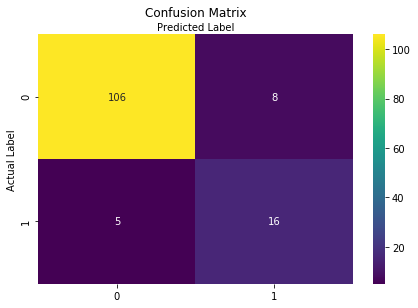

In [20]:
fig, ax = plt.subplots()
#tick_marks = np.arange(len(class_names))
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confMat), annot=True, cmap='viridis', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Confusion Matrix Evaluation Metrics

In [15]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('Precision:', metrics.precision_score(y_test,y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.7407407407407407
Precision: 0.29411764705882354
Recall: 0.47619047619047616
